In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
# Coletando os nomes dos datasets disponíveis por padrão no Seaborn:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

# **Titanic**
---

In [137]:
data_sns = sns.load_dataset('titanic')

data_sns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [138]:
# Agrupar dados:
group = data_sns.groupby('class')['fare'].mean()
group

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [139]:
# Agrupando em formato de dataframe:
group = data_sns.groupby('class')[['fare']].mean()
group

,fare
class,
First,84.154687
Second,20.662183
Third,13.675550


In [140]:
group.index

CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

In [141]:
group.columns

Index(['fare'], dtype='object')

In [142]:
# Unstack (preparação para plot):
group = data_sns.groupby('class', as_index=False)[['fare']].mean().round(2)
group

,class,fare
0,First,84.15
1,Second,20.66
2,Third,13.68


In [143]:
group.index

RangeIndex(start=0, stop=3, step=1)

In [144]:
group.columns

Index(['class', 'fare'], dtype='object')

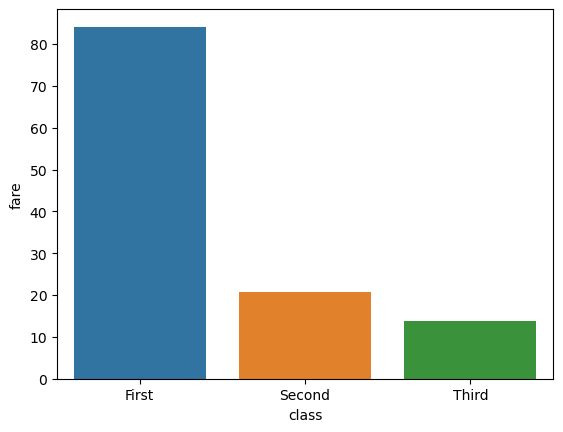

In [145]:
# Plot:
sns.barplot(group, x='class', y='fare')

plt.show()

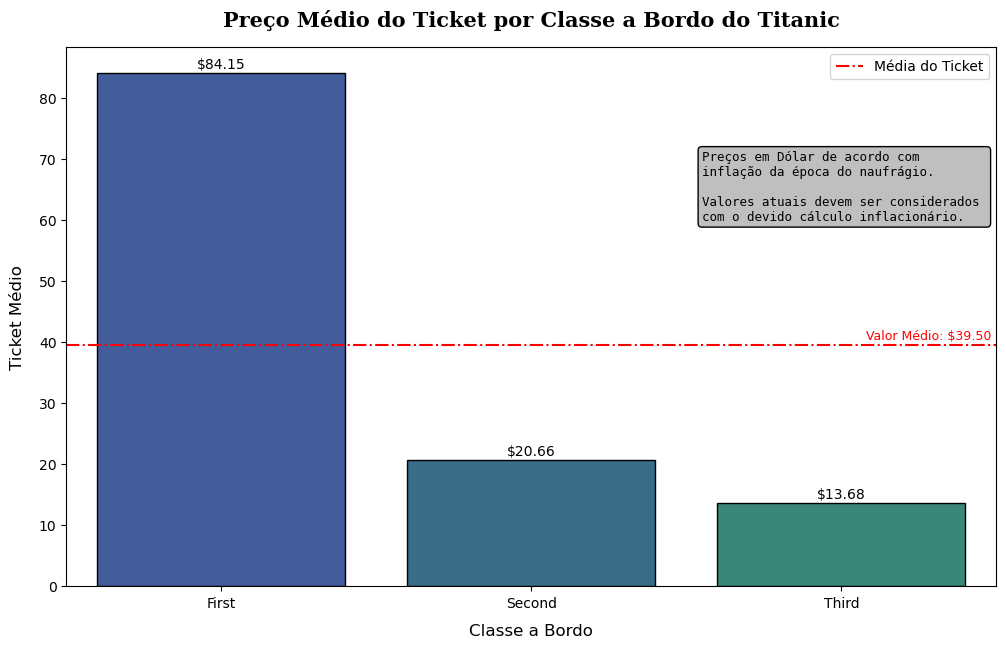

In [146]:
# Tamanho do plot:
figura, axes = plt.subplots(figsize=(12,7))

# Medida usada para alguns elementos gráficos:
media_ticket = group['fare'].mean()
#----------------------------------------------------------------------------------#

# Criando o gráfico de barras com seaborn:
grafico = sns.barplot(group, x='class', y='fare', edgecolor='black', palette='winter', saturation=0.4)

# Formatando labels dos eixos x e y:
plt.xlabel('Classe a Bordo', fontsize=12, labelpad=10)
plt.ylabel('Ticket Médio', fontsize=12, labelpad=10)

# Adicionando valores de maneira formatada no topo das barras:
for (labels) in grafico.containers:
    axes.bar_label(labels, padding=1, fmt="$%.2f", color='black')

# Adicionando título formatado ao plot:
plt.title('Preço Médio do Ticket por Classe a Bordo do Titanic', 
           fontdict={'size': 15, 'weight': 'bold', 'family': 'serif'}, pad=15)

# Criando anotação de aviso ao leitor:
plt.annotate(
'''Preços em Dólar de acordo com 
inflação da época do naufrágio.

Valores atuais devem ser considerados 
com o devido cálculo inflacionário.''', 
             fontsize=9, 
             fontfamily='monospace',
             xy=(1.55, 60), 
             bbox={'boxstyle':'round', 'fc':'0.75'})

# Criando e formatando linha de média:
axes.axhline(y=media_ticket, color='red', linestyle="dashdot", linewidth=1.5, label='Média do Ticket')

axes.annotate(f'Valor Médio: ${media_ticket:.2f}', xy=(2.08, media_ticket + 1), fontsize=9, color='red')

#-----------------------------------------------------------------------------------#
# Pedindo ao matplotlib mostrar os "labels" definidos em formato de legenda:
plt.legend()

# Plotando o gráfico resultante:
plt.show()

## **Gráficos de Comparação (multibar chart/catplot)**
---

In [147]:
data_sns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


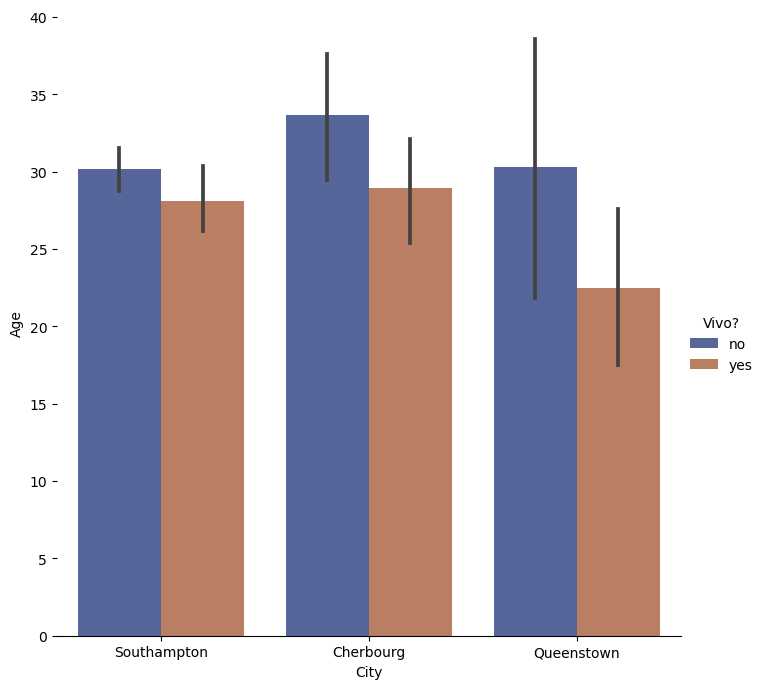

In [148]:
g = sns.catplot(data=data_sns, 
                kind="bar",
                x="embark_town", 
                y="age", 
                hue="alive", 
                palette="dark", 
                alpha=.7, 
                height=7)

g.despine(left=True)
g.set_axis_labels("City","Age")
g.legend.set_title("Vivo?")

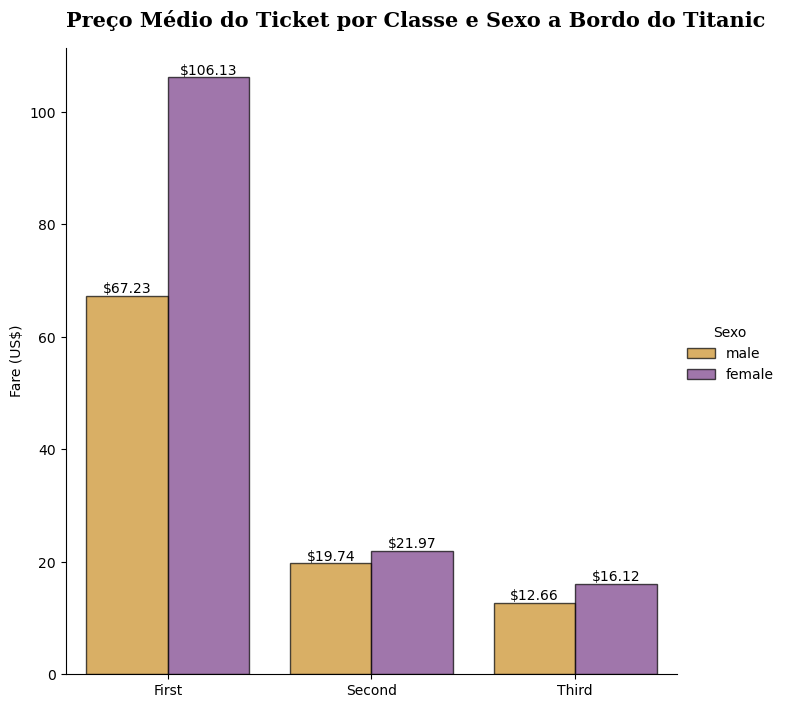

In [149]:
g = sns.catplot(data=data_sns, 
                kind="bar",
                x="class", # Variável Qualitativa
                y="fare",  # Variável Quantitativa
                hue="sex", # Variável Qualitativa 
                palette="CMRmap_r", 
                alpha=.7, 
                height=7,
                errorbar=None,
                edgecolor='black')

ax = g.facet_axis(0, 0)

for container in ax.containers:
    labels = [f'${(bar.get_height()):.2f}' for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.title('Preço Médio do Ticket por Classe e Sexo a Bordo do Titanic', 
           fontdict={'size': 15, 'weight': 'bold', 'family': 'serif'}, pad=15, loc='left')

g.set_axis_labels("", "Fare (US$)")
g.legend.set_title("Sexo")

plt.show()

## **Penguins: Gráficos de Comparação**
---

In [150]:
penguins = sns.load_dataset("penguins")

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


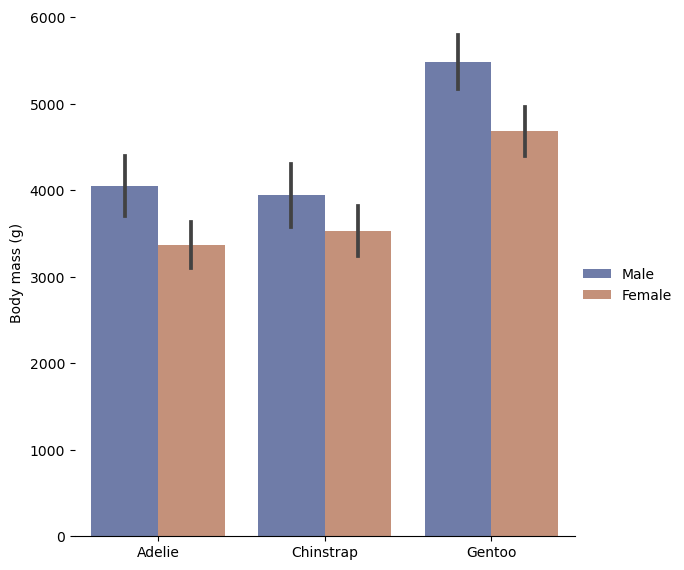

In [151]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

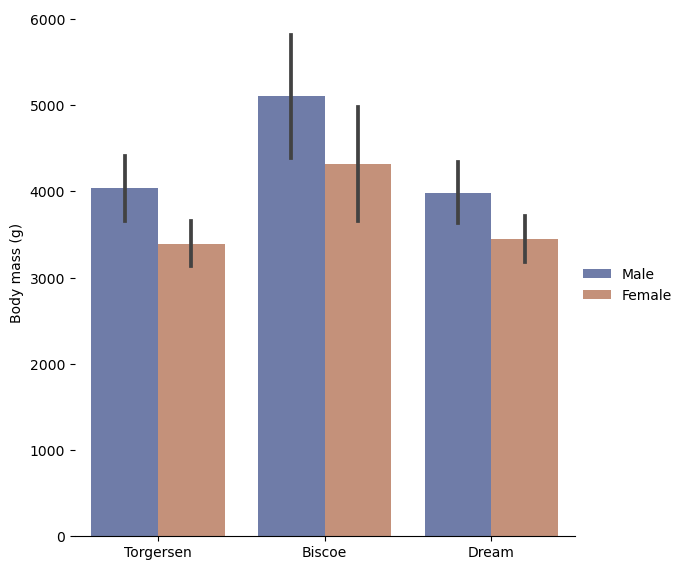

In [152]:
g = sns.catplot(
    data=penguins, kind="bar",
    x="island", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# **Links Úteis!**
---

- [Seaborn Palettes (site em Inglês, rolando a página temos exemplos visuais das paletas e cores)](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)

- [Seaborn Catplot (documentação em Inglês)](https://seaborn.pydata.org/generated/seaborn.catplot.html)

- [Seaborn Gráficos (documentação em Inglês)](https://seaborn.pydata.org/examples/index.html)

- [Hashtag Treinamentos: Seaborn (site em português)](https://www.hashtagtreinamentos.com/graficos-com-seaborn-no-python)

- [Tipos de Variáveis: Introdução (site em português)](https://blog.fastformat.co/estatistica-basica-tipos-de-variaveis/)